# Lecture 07 - Một số thuật toán Học máy ko giám sát (Unsupervised)

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [20]:
from sklearn import metrics, datasets

## K-mean clustering

In [21]:
from sklearn.cluster import KMeans

In [22]:
data = datasets.load_iris(as_frame=True)
df = data['frame']
print(data['DESCR'])
display(df.info(), df.sample(10))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
139,6.9,3.1,5.4,2.1,2
120,6.9,3.2,5.7,2.3,2
7,5.0,3.4,1.5,0.2,0
87,6.3,2.3,4.4,1.3,1
138,6.0,3.0,4.8,1.8,2
77,6.7,3.0,5.0,1.7,1
9,4.9,3.1,1.5,0.1,0
133,6.3,2.8,5.1,1.5,2
103,6.3,2.9,5.6,1.8,2
4,5.0,3.6,1.4,0.2,0


In [23]:
X, y = df[['petal length (cm)', 'petal width (cm)']], df['target']

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

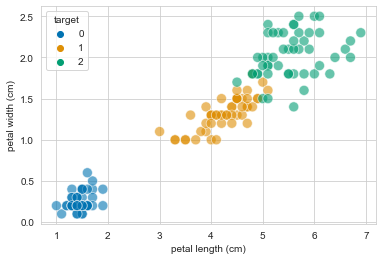

In [24]:
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue=y,s=100, alpha=0.6, palette='colorblind')

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

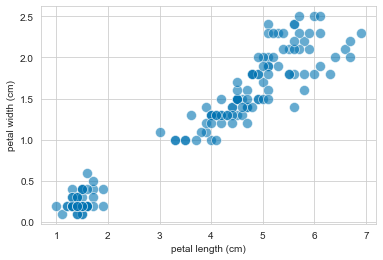

In [25]:
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)',s=100, alpha=0.6, palette='colorblind')
#without the alabel we can not see what separtation betwwen them that is why we have unsuppervived learning

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=3) # define the modelling 
kmeans.fit(X)                 #push databse to model 
y_pred = kmeans.predict(X)    #predict

In [28]:
display(y_pred, y.values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
metrics.accuracy_score(y,y_pred)

0.30666666666666664

In [30]:
value_map = {1: 0, 2: 1, 0: 2}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Actual')

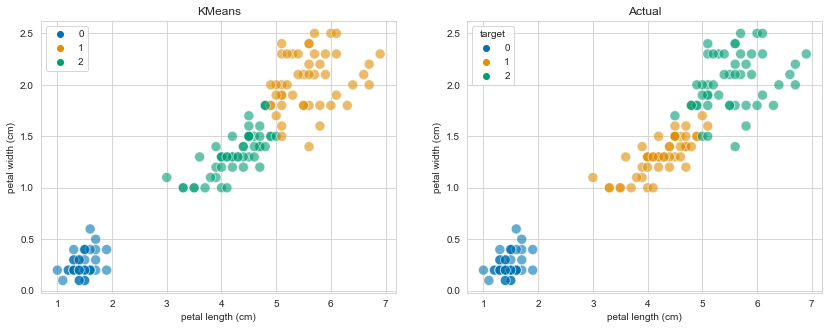

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.6, palette='colorblind', ax=axs[0]
)
ax.set_title('KMeans')

ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind', ax=axs[1]
)
ax.set_title('Actual')

In [32]:
metrics.accuracy_score(y, y_pred)*100

37.333333333333336

### **WE have to map the database to can separate the modelling**

Thuật toán là tìm tâm để sao khảong cách tâm là nhỏ nhất
->Transformation and rotation matric to find the center after that nearest what will move to this label

### Clusters Centers

How to show the center of them?

In [33]:
kmeans.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

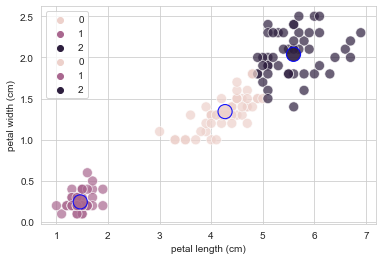

In [34]:
ax = sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue=kmeans.labels_,s=100, alpha=0.7)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], hue=np.arange(0, 3),s=200, alpha=0.9, ax=ax, edgecolor='b')

You can see that we have 3 points center for this task which we can know where is that ringht now?

### How does it work?

![](https://cdn-images-1.medium.com/max/800/1*ZrwEraj9S-u_KOWdKWc8sQ.png)

In [35]:
from sklearn.metrics import pairwise_distances_argmin
n_clusters = 3
# We will use 3 random point and then we do it again and again the algorithms to predict the best point among them

In [36]:
first_guess = X.sample(n_clusters)
first_guess['target'] = np.arange(0, n_clusters)
first_guess

,petal length (cm),petal width (cm),target
59,3.9,1.4,0
67,4.1,1.0,1
21,1.5,0.4,2


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

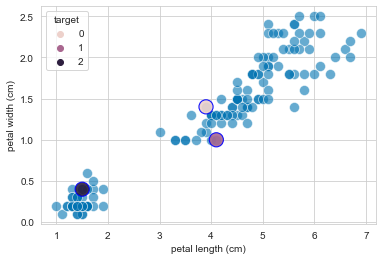

In [37]:
ax = sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)',s=100, alpha=0.6)
sns.scatterplot(data=first_guess, x='petal length (cm)', y='petal width (cm)', hue='target',s=200, alpha=0.9, ax=ax, edgecolor='b')

In [38]:
pairwise_distances_argmin(X, first_guess.iloc[:, :2])
#pairwise_distances_argmin(X, first_guess.iloc[:, :2]) how many feature


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
y_pred = pairwise_distances_argmin(X, first_guess.iloc[:, :2])

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

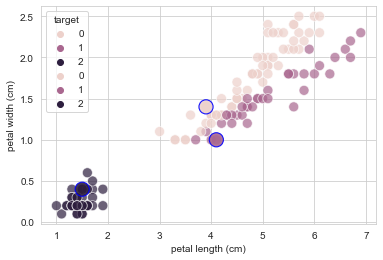

In [40]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.7
)

sns.scatterplot(
    data=first_guess, x='petal length (cm)', y='petal width (cm)', hue='target',
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

In [41]:
cluster_centers = X.groupby(y_pred).mean()
cluster_centers

,petal length (cm),petal width (cm)
0,4.755556,1.750794
1,5.162162,1.548649
2,1.462000,0.246000


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

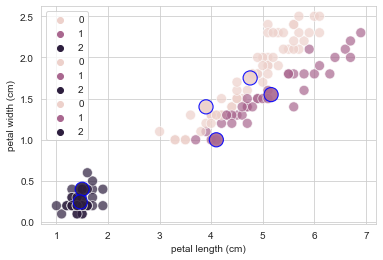

In [42]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.7
)

sns.scatterplot(
    data=first_guess, x='petal length (cm)', y='petal width (cm)', hue='target',
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

sns.scatterplot(
    data=cluster_centers, x='petal length (cm)', y='petal width (cm)', hue=cluster_centers.index,
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

## Finding optimal K

- **How many clusters is the best**
- **What we can separate between them**
- **The good value should be the point whe the diagram srtart decrease slowly**

In [43]:
kmeans.inertia_ # sum of distances tổng tất cả khoảng cách MSE= sum of all erro--> howmanyK is GOOD?

31.371358974358966

In [44]:
sse= []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append((i, km.inertia_))
sse = np.array(sse)
sse

array([[  1.        , 550.89533333],
       [  2.        ,  86.39021985],
       [  3.        ,  31.37135897],
       [  4.        ,  19.47712336],
       [  5.        ,  13.91690876],
       [  6.        ,  11.11252553],
       [  7.        ,   9.36378237],
       [  8.        ,   7.66701952],
       [  9.        ,   6.45649454],
       [ 10.        ,   5.71652564]])

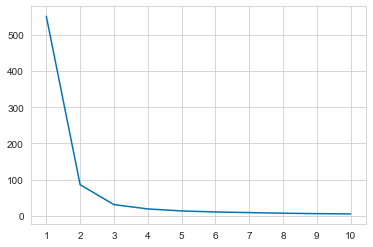

In [45]:
fig = plt.figure()
plt.xticks(sse[:, 0])
plt.plot(sse[:, 0], sse[:, 1])

**Basing on the digaram we can know well 3 is the best**

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

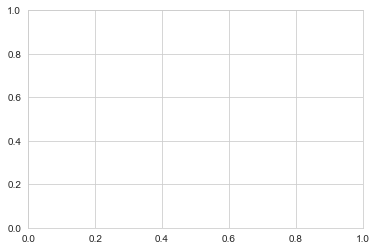

In [46]:
plt.xticks()

## Hierarchical Clustering

## **Phân cụm kiểu phân cấp!**
- Thực tế là khoảng cách
- Có 2 kiểu
    * Tích tụ: cáo nào gioống nhau (gộp)-->Tiếp tục gộp gộp and gôp 
    * Phân rã...
    
- Dựa vào khoảng cách giữ ác điểm (bảng xếp hạng)

### Agglomerative vs Divisive

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181551/Untitled-Diagram71.png)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181916/Untitled-Diagram-153-1.png)

In [64]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3)
y_pred = ward.fit_predict(X) #ko co method fit() và predict riêng ->fit_predict()

In [65]:
display(y_pred, y.values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
value_map = {1: 0, 2: 1, 0: 2}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred
#AgglomerativeClustering không có fit và predictriêng

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'Actual')

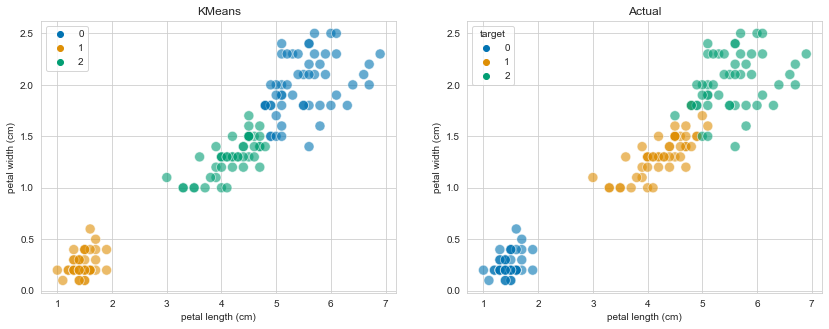

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.6, palette='colorblind', ax=axs[0]
)
ax.set_title('KMeans')

ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind', ax=axs[1]
)
ax.set_title('Actual')

In [73]:
metrics.accuracy_score(y, y_pred)*100

0.6666666666666667

In [74]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


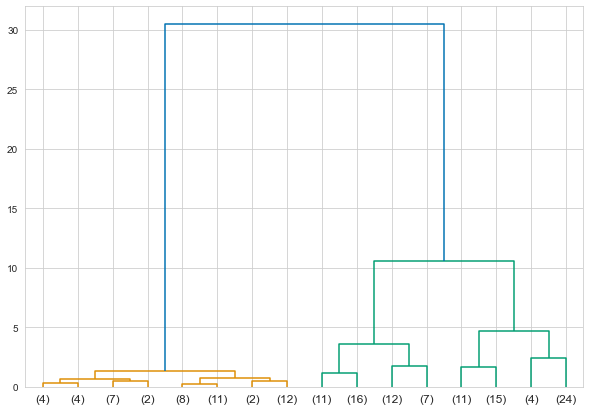

In [75]:
ward = AgglomerativeClustering(compute_distances=True, n_clusters=3)
ward.fit(X)

fig = plt.figure(figsize=(10, 7))
plot_dendrogram(ward, truncate_mode='level', p=3)

## Gausian Mixture

**<p style="color:red">Basing on the normaldistribution we have bell and basing ib that we think the data as a shaddow of a bell**

In [54]:
from sklearn.mixture import GaussianMixture

gnm = GaussianMixture(n_components=3)  #define the model
gnm.fit(X)                             #push data train to model 
y_pred = gnm.predict(X)                #predictbasingon model
y_pred                                 #show the yprediction
display(y_pred,y.values)               #comparisionbetween y_predict and ytarget
#normaldistrubution( nu giá trị trung bình độ lệch chuẩn và kurtois)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
value_map = {1: 0, 2: 1, 0: 2}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
metrics.accuracy_score(y, y_pred)*100

2.0

Text(0.5, 1.0, 'Actual')

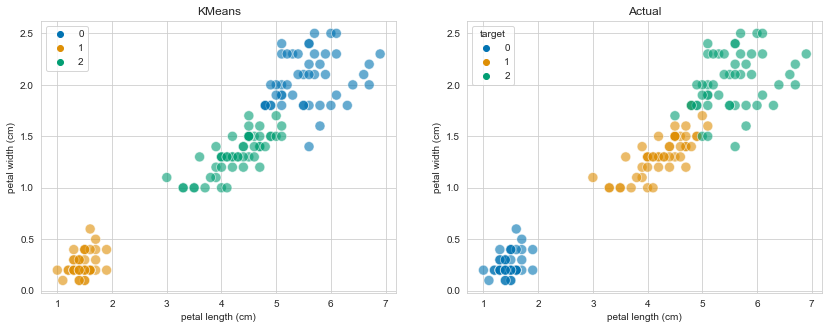

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.6, palette='colorblind', ax=axs[0]
)
ax.set_title('KMeans')

ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind', ax=axs[1]
)
ax.set_title('Actual')

In [58]:
metrics.accuracy_score(y, y_pred)*100

2.0

In [59]:
print(gnm.predict_proba(X).shape)
gnm.predict_proba(X)[:30, :]
# 3 values means that: tỉ lệ % đoán cho từng giá trị dự đoán 0,1,2

(150, 3)


array([[6.03023352e-09, 2.99590401e-19, 9.99999994e-01],
       [6.03023352e-09, 2.99590401e-19, 9.99999994e-01],
       [3.31592798e-09, 1.34120339e-19, 9.99999997e-01],
       [1.43420261e-08, 9.43553867e-19, 9.99999986e-01],
       [6.03023352e-09, 2.99590401e-19, 9.99999994e-01],
       [1.26483777e-06, 1.07193899e-15, 9.99998735e-01],
       [1.28637993e-08, 2.15112551e-18, 9.99999987e-01],
       [1.43420261e-08, 9.43553867e-19, 9.99999986e-01],
       [6.03023352e-09, 2.99590401e-19, 9.99999994e-01],
       [1.03522722e-08, 3.81199951e-19, 9.99999990e-01],
       [1.43420261e-08, 9.43553867e-19, 9.99999986e-01],
       [4.46102045e-08, 4.18997129e-18, 9.99999955e-01],
       [4.34941317e-09, 1.00557727e-19, 9.99999996e-01],
       [1.61398555e-09, 1.45022904e-20, 9.99999998e-01],
       [2.38464309e-09, 8.46577927e-20, 9.99999998e-01],
       [1.00266327e-07, 8.09227491e-17, 9.99999900e-01],
       [2.32522120e-08, 2.41430943e-17, 9.99999977e-01],
       [1.28637993e-08, 2.15112

In [60]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gnm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=10, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

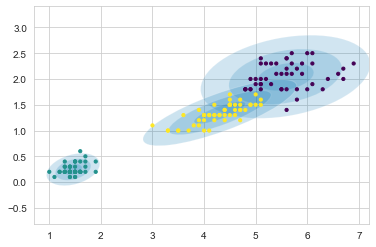

In [61]:
plot_gnm(gnm, X.values)

In [62]:
##<p style="color:red">

## DBSCAN

## PCA

## Spectral Clustering